<a href="https://colab.research.google.com/github/hykim-1/Study/blob/main/winequality_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== 결측치 개수 확인 ===
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3638 - loss: 1.6114 - val_accuracy: 0.5255 - val_loss: 1.1899
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5232 - loss: 1.1999 - val_accuracy: 0.5344 - val_loss: 1.1432
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5290 - loss: 1.1358 - val_accuracy: 0.5344 - val_loss: 1.1120
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5632 - loss: 1.0675 - val_accuracy: 0.5357 - val_loss: 1.1026
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 1.0815 - val_accuracy: 0.5408 - val_loss: 1.0997
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5474 - loss: 1.0602 - val_accuracy: 0.5408 - val_loss: 1.0902
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5491 - loss: 1.0413 - val_accuracy: 0.5408 - val_loss: 1.0860
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5585 - loss: 1.0553 - val_accuracy: 0.5561 - val_

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


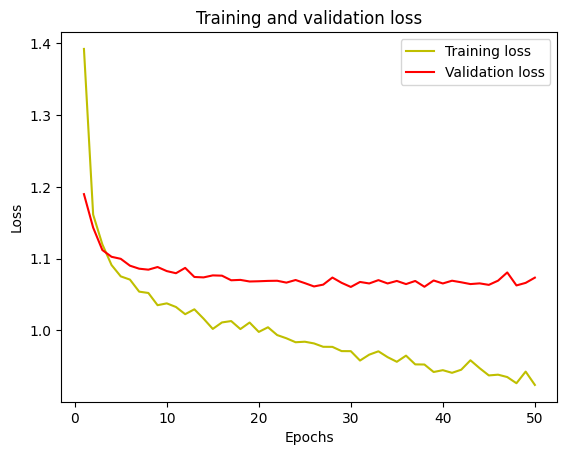

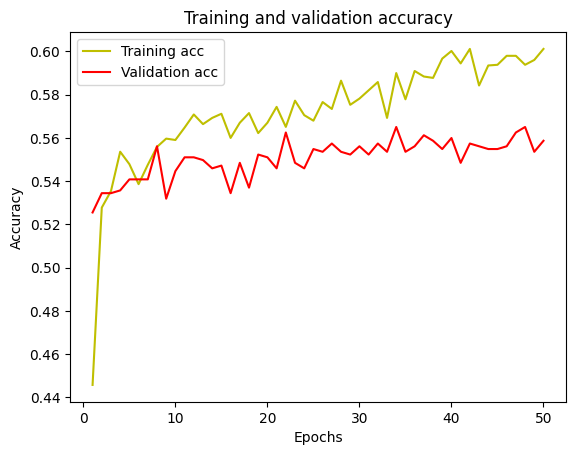

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1) 데이터 준비
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/winequality-white.csv",
                 delimiter=";", encoding="utf-8")

# 결측치 확인
print("=== 결측치 개수 확인 ===")
print(df.isnull().sum())

# 결측치 제거
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=["quality"])
y = df["quality"]

# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 원-핫 인코딩 (y를 다중클래스로)
Y = pd.get_dummies(y).values

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 2) 모델 구성
# -----------------------------
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# -----------------------------
# 3) 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# -----------------------------
# 4) 평가
# -----------------------------
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print("=== Classification Report ===")
print(classification_report(y_test_class, y_pred_class))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_class, y_pred_class))

# -----------------------------
# 5) 학습 곡선 시각화
# -----------------------------
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
